<a href="https://colab.research.google.com/github/suryadeepjaykar/airbnb-data-analysis/blob/main/Suryadeep_Jaykar_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Data/Airbnb NYC 2019.csv'
airbnb = pd.read_csv(file_path)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#columns

list(airbnb.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#pricerange

price_list = airbnb['price'].tolist()
min_price = min(price_list)
max_price = max(price_list)
f'The minimum price of room rent is Rs.{min_price} and maximum price for rent is Rs. {max_price}'

'The minimum price of room rent is Rs.0 and maximum price for rent is Rs. 10000'

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#we gonna remove most null entries columns
new_df = airbnb.drop(['last_review', 'reviews_per_month'], axis = 1)
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### **1. What can we learn about different hosts and areas?**

In [ ]:
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(20)


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
13216,Sonder,Manhattan,96
6540,Jeremy & Laura,Manhattan,96
2901,Corporate Housing,Manhattan,91


we can see most number of listings are from **Manhattan** having hosts Sonder (NYC), Blueground,

## **2.What can we learn from predictions? (ex: locations, prices, reviews, etc)** 

In [ ]:
loc_price_analys = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
loc_price_analys

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


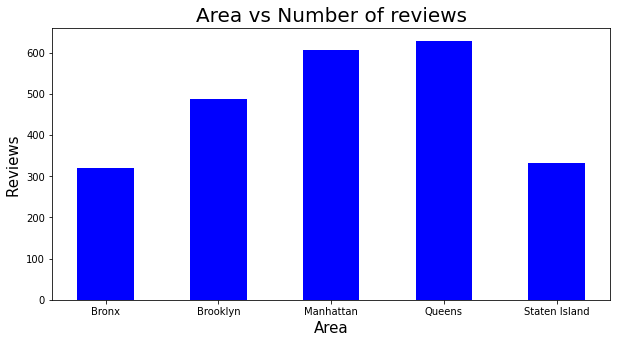

In [ ]:
area = loc_price_analys['neighbourhood_group']
no_of_rev = loc_price_analys['number_of_reviews']

fig = plt.figure(figsize = (10,5))

plt.bar(area, no_of_rev, color ='blue',
        width = 0.5)

plt.title("Area vs Number of reviews", fontsize = 20)
plt.xlabel("Area", fontsize = 15)
plt.ylabel("Reviews ", fontsize = 15)
plt.show()

In [ ]:
price_by_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_by_area.head()

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


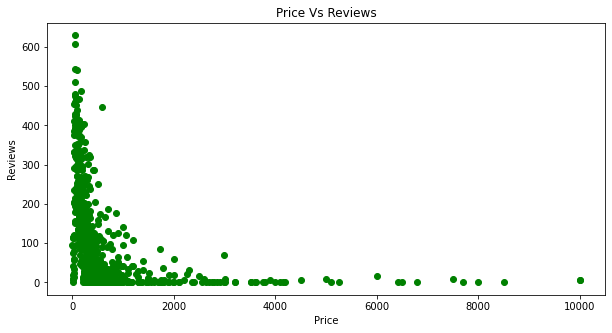

In [ ]:
price = price_by_area['price']
reviews_area = price_by_area['number_of_reviews']


fig = plt.figure(figsize = (10, 5))

#create scatter plot
plt.scatter(price,reviews_area,c = 'green')

plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Price Vs Reviews')

plt.show()



 **As we can see more number of reviews as room price decreases.
So we can conclude that guests prefer cheaper hotelst**

### **3.Which hosts are the busiest and why?**

In [ ]:
busy_hosts = new_df.groupby(['host_name','host_id','room_type','price','availability_365'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by='number_of_reviews',ascending = False).head(20)
busy_hosts

,host_name,host_id,room_type,price,availability_365,number_of_reviews
12537,Dona,47621202,Private room,47,333,629
21716,Jj,4734398,Private room,49,293,607
21718,Jj,4734398,Private room,49,342,597
21717,Jj,4734398,Private room,49,339,594
12536,Dona,47621202,Private room,47,173,576
31320,Maya,37312959,Private room,46,163,543
7762,Carol,2369681,Private room,99,179,540
10901,Danielle,26432133,Private room,48,341,510
4800,Asa,12949460,Entire home/apt,160,269,488
46545,Wanda,792159,Private room,60,0,480


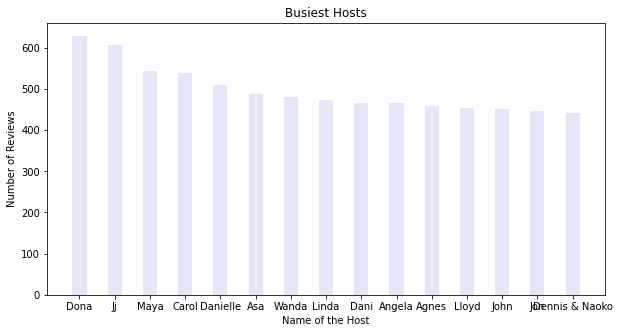

In [ ]:
host = busy_hosts['host_name']
reviews = busy_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(host, reviews, color ='lavender',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

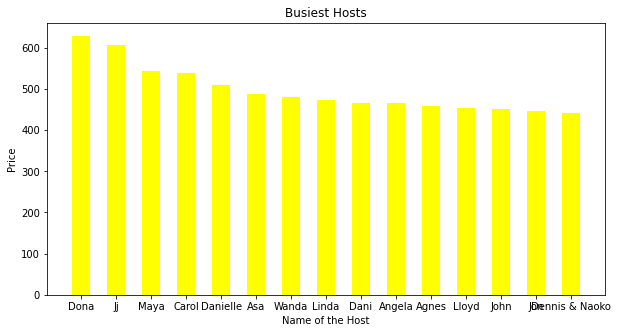

In [ ]:
host = busy_hosts['host_name']
price = busy_hosts['price']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(host, reviews, color ='yellow',
        width = 0.5)
 
plt.xlabel("Name of the Host")
plt.ylabel("Price")
plt.title("Busiest Hosts")
plt.show()

Busiest Hosts are:
**1.Dona
2.Ji
3.Maya 
4.Carol**

These hosts are busy because of the preferred room type is Private Room and Entire Home Apartment with cheap price and Maximum availability

# **4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
traffic_data = new_df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].count().reset_index()
traffic_data = traffic_data.sort_values(by='minimum_nights', ascending=False)
traffic_data.head(20)

,room_type,neighbourhood_group,minimum_nights
2,Entire home/apt,Manhattan,13199
6,Private room,Brooklyn,10132
1,Entire home/apt,Brooklyn,9559
7,Private room,Manhattan,7982
8,Private room,Queens,3372
3,Entire home/apt,Queens,2096
5,Private room,Bronx,652
12,Shared room,Manhattan,480
11,Shared room,Brooklyn,413
0,Entire home/apt,Bronx,379


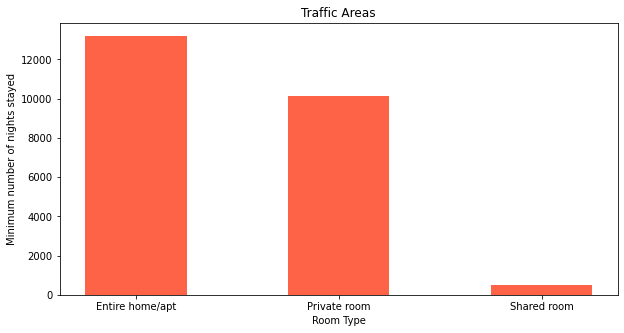

In [ ]:
room_type = traffic_data['room_type']
nights = traffic_data['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, nights, color ='tomato',
        width = 0.5)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

From above dataset we can say that guests prefer to stay in entire Home Apartment and private room as they cheaper in price and also near to Manhattn, Brooklyn, Queens and Bronx

### **Conclusion:**

## 1. The people prefer to stay longer time in entire home/ apartments and private rooms as they are cheaper availability is more in a particular neighbourhood
## 2. Most People perfer to stay in rooms which are cheaper in price but not be shared room.
## 3. People who stay less than 2 nights they are travellers and the host in not popular.
## 4. Popular tourist place has more reviews. and cheaper price.